<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preprocessing-and-feature-selection" data-toc-modified-id="Preprocessing-and-feature-selection-1">Preprocessing and feature selection</a></span></li><li><span><a href="#More-on-data-inspection" data-toc-modified-id="More-on-data-inspection-2">More on data inspection</a></span><ul class="toc-item"><li><span><a href="#Data-wrangling" data-toc-modified-id="Data-wrangling-2.1">Data wrangling</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Duplicated-data" data-toc-modified-id="Duplicated-data-2.1.0.1">Duplicated data</a></span></li></ul></li><li><span><a href="#NaN-(Not-a-Number)" data-toc-modified-id="NaN-(Not-a-Number)-2.1.1">NaN (Not a Number)</a></span><ul class="toc-item"><li><span><a href="#Exercise-1.-Write-a-line-of-code-which-will-identify-whether-or-not-there-exist-any-missing-data-at-all-in-the-dataframe-(returns-True-or-False)." data-toc-modified-id="Exercise-1.-Write-a-line-of-code-which-will-identify-whether-or-not-there-exist-any-missing-data-at-all-in-the-dataframe-(returns-True-or-False).-2.1.1.1">Exercise 1. Write a line of code which will identify whether or not there exist any missing data at all in the dataframe (returns <code>True</code> or <code>False</code>).</a></span></li><li><span><a href="#Exercise-2.-Identify-the-indeces-of-the-rows-which-has-NaNs" data-toc-modified-id="Exercise-2.-Identify-the-indeces-of-the-rows-which-has-NaNs-2.1.1.2">Exercise 2. Identify the indeces of the rows which has NaNs</a></span></li><li><span><a href="#Exercise-3.-Use-that-index-to-return-only-those-rows" data-toc-modified-id="Exercise-3.-Use-that-index-to-return-only-those-rows-2.1.1.3">Exercise 3. Use that index to return only those rows</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Scaling-features" data-toc-modified-id="Scaling-features-3">Scaling features</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Further-reading:" data-toc-modified-id="Further-reading:-3.0.1">Further reading:</a></span></li></ul></li></ul></li><li><span><a href="#Feature-selection" data-toc-modified-id="Feature-selection-4">Feature selection</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Univariate-feature-selection" data-toc-modified-id="Univariate-feature-selection-4.0.1">Univariate feature selection</a></span></li><li><span><a href="#Let's-try-to-visualize-the-data-with-PCA" data-toc-modified-id="Let's-try-to-visualize-the-data-with-PCA-4.0.2">Let's try to visualize the data with PCA</a></span></li><li><span><a href="#Select-top-features-with-a-chi-squared-test." data-toc-modified-id="Select-top-features-with-a-chi-squared-test.-4.0.3">Select top features with a chi squared test.</a></span></li></ul></li><li><span><a href="#False-discovery-rate-(FDR)" data-toc-modified-id="False-discovery-rate-(FDR)-4.1">False discovery rate (FDR)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Exercise-4.-How-many-features-were-selected-at-a-FDR=0.01?" data-toc-modified-id="Exercise-4.-How-many-features-were-selected-at-a-FDR=0.01?-4.1.0.1">Exercise 4. How many features were selected at a FDR=0.01?</a></span></li><li><span><a href="#Exercise-5.-Sort-the-features-by-p-value-from-lowest-to-highest." data-toc-modified-id="Exercise-5.-Sort-the-features-by-p-value-from-lowest-to-highest.-4.1.0.2">Exercise 5. Sort the features by p-value from lowest to highest.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Multi-variate-feature-selection" data-toc-modified-id="Multi-variate-feature-selection-5">Multi-variate feature selection</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Linear-regression" data-toc-modified-id="Linear-regression-5.0.1">Linear regression</a></span></li></ul></li><li><span><a href="#PLS-DA" data-toc-modified-id="PLS-DA-5.1">PLS-DA</a></span></li><li><span><a href="#Interpreting-coefficients" data-toc-modified-id="Interpreting-coefficients-5.2">Interpreting coefficients</a></span><ul class="toc-item"><li><span><a href="#Correlated-features" data-toc-modified-id="Correlated-features-5.2.1">Correlated features</a></span></li><li><span><a href="#A-final-word-on-feature-scaling" data-toc-modified-id="A-final-word-on-feature-scaling-5.2.2">A final word on feature scaling</a></span></li></ul></li></ul></li><li><span><a href="#Feature-Extraction" data-toc-modified-id="Feature-Extraction-6">Feature Extraction</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Train" data-toc-modified-id="Train-6.0.1">Train</a></span></li><li><span><a href="#Predicting--from-the-compressed-features" data-toc-modified-id="Predicting--from-the-compressed-features-6.0.2">Predicting  from the compressed features</a></span></li></ul></li></ul></li></ul></div>

# Preprocessing and feature selection

You will hear time and time again that one who does machine learning will spend only about ten percent of their time doing machine learning, the remaining 90 percent gathering, understanding, visualizing and wrangling data. Here we present some of the crucial know-hows in preparing data to machine learning. 


# More on data inspection

We specifically are concerned about the quality of our data. A common phrase in the field is "garbage in, garbage out", which emphasizes that the model itself is often less important than the data it has been trained on. An example of bad data can be the presence of outliers, or poor annotation which leads to duplicated datapoints or incomplete data. All these fenomena are common in the real world.

## Data wrangling

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.DataFrame(np.zeros([4,2]), columns=['c1','c2'])

In [3]:
df

,c1,c2
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0


In [4]:
df.describe()

,c1,c2
count,4.0,4.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


#### Duplicated data
A good habit is to look for duplicates, introduced by human error in large, poorly maintained datasets. Here we show how to do so. `df.duplicated()` is an array of boolean values whether the sample occurs multiple times in the dataset.

In [5]:
print(df.duplicated())

0    False
1     True
2     True
3     True
dtype: bool


**Note**: this particular data set does not have very precise decimals, so the likelihood of some samples randomly being identical is relatively high. The method is more suitable when features are numerous, and especially if each row has some sort of identifier column. In fact, we have one false positive.

In [6]:
# which is the ((false)) duplicate?
duplicates = df.duplicated()
df[duplicates]

,c1,c2
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0


In [7]:
# which is the ((false)) duplicate?
duplicates = df.duplicated()
df[duplicates]

,c1,c2
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0


### NaN (Not a Number)

Many algorithms deal poorly with missing data. In fact, many will completely stop working if some data is missing, and it is up to us to fill it in prior to machine learning. In Pandas we can identify missing values as follows: 

In [8]:
df.isna()

,c1,c2
0,False,False
1,False,False
2,False,False
3,False,False


We can introduce one artificially using `np.nan`

In [9]:
df.iloc[0,1] = np.nan
df.iloc[1,1] = np.nan
df

,c1,c2
0,0.0,NaN
1,0.0,NaN
2,0.0,0.0
3,0.0,0.0


We recommend reading the documentation for any dataset. For example many use "?" to signify missing values. You can control this in the `na_values` argument when loading a dataframe.

In [10]:
df.isna()

,c1,c2
0,False,True
1,False,True
2,False,False
3,False,False


#### Exercise 1. Write a line of code which will identify whether or not there exist any missing data at all in the dataframe (returns `True` or `False`).

In [11]:
# %load solutions/ex4_1.py
np.any(df.isna().values)
# .values turns it into a numpy array, onto which you can apply np.any

#df.isna().any() can  also be useful


True

#### Exercise 2. Identify the indeces of the rows which has NaNs

In [12]:
# %load solutions/ex4_2.py
idxs = df.isna().any(axis=1) # axis=1 does it row-wise
idxs

0     True
1     True
2    False
3    False
dtype: bool

#### Exercise 3. Use that index to return only those rows

In [13]:
# %load solutions/ex4_3.py
df[idxs]

,c1,c2
0,0.0,NaN
1,0.0,NaN


`df.dropna()` removes the samples with nan-values from the dataset, and saves you the work of dealing with them. Another option is to fill in NaN-values with the group average for instance. This is done using `df.fillna()`. Filling the NaNs has to follow some strategy, depening on what type of data it is. Missing values are often filled in with the most frequent (mode) of the observations.
Numerical data is often filled using the mean or mode of the observations.. If the data is sequential (for example following a data), it might make more sense to interpolate between the neighboring values.  

In [14]:
df.dropna() # you see rows #0 and #1 are gone now, but it doesn't drop in place

,c1,c2
2,0.0,0.0
3,0.0,0.0


In [15]:
df.fillna(value=0.)

,c1,c2
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0


# Scaling features

We have already seen why this is important in another notebook. `sklearn` harbors many functions for scaling data to a suitable range. 

The most common method is Standard scaling (zero mean and unit variance). Another much used scaler is MinMax-scaler (putting it on the 0-1 range). Sklearn's `RobustScaler` is especially designed to scaling data with outliers present. In certain situations, for example if we wish to retain sparsity in our data (largely consisting of 0s), standardizing will *"unsparsify"* our data, so keep this in mind.

Here we will compare the effect scalers have on the feature ranges.

In [16]:
# make synthetic data
np.random.seed(0)

data = np.random.rand(6,4) * np.random.randint(1,5,4).reshape(1,-1)
fnames = [f'f{i+1}' for i in range(data.shape[1])]
data = pd.DataFrame(data, columns=fnames)

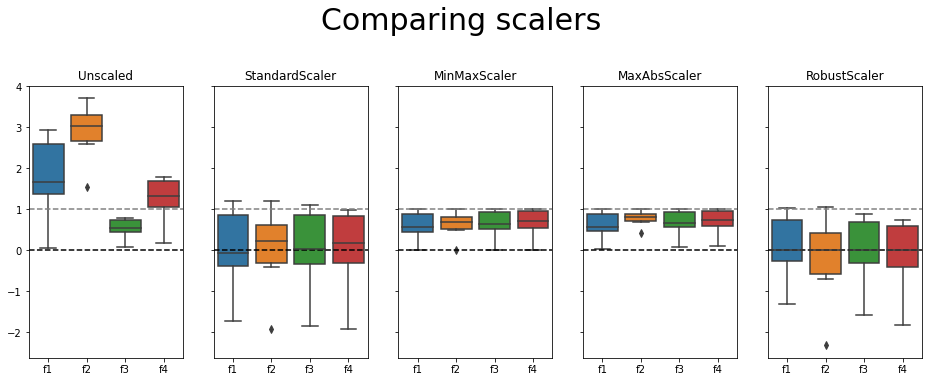

In [17]:
# comparing scalers, don't worry about the code
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

fig, axs = plt.subplots(1,5, figsize=(16,5), sharey=True, )
i=0
X = data.values

sns.boxplot(data=data, ax=axs[i])
axs[i].set_title('Unscaled')
axs[i].axhline(0, c='k', ls='--')
axs[i].axhline(1, c='gray', ls='--')

for scaler in [StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler]: 
    i+=1
    s = scaler()
    df = pd.DataFrame(s.fit_transform(X), columns=fnames)
    sns.boxplot(data=df, ax=axs[i])
    ttl = str(s.__class__).split('.')[-1][:-2]
    axs[i].set_title(f'{ttl}')
    axs[i].axhline(0, c='k', ls='--')
    axs[i].axhline(1, c='gray', ls='--')

plt.suptitle('Comparing scalers', fontsize=30, y=1.1)
plt.show()

In short, you can use the following rules of thumb:

**StandardScaler:** For regularized (L1 or L2) linear models, SVM with RBF kernel, Neural networks, PCA

**MaxAbsScaler:** For sparse data, when you wish to preserve sparsity

**MinMaxScaler:** For non-Gaussian distributed features, also for small variances

**RobustScaler:** For handling data with outliers


### Further reading:
https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

# Feature selection

Often you will experience that features are largely redundant and you need a way to filter out the useless features from the ones that are actually important to predict your target of interest. Another problem with many features is the infamous *curse of dimensionality*, which refers to a number of consequences of high dimensions which make it difficult to train ML algorithms. For intance, PCA is common prior to running t-SNE. So model quality can be a motivation. Another motivation is simply the speed of the algorithm - the larger the dimensionality, the slower the training and prediction.


Reducing dimensionality can be classified into feature selection techniques (choosing among the available features) and feature engineering (combining the old features to make new ones, e.g. PCA). Feature selection is particularly important when you have a small sample size and many dimensions ($N<<d$).

### Univariate feature selection

We start out simple. The most obvious way to determine if a feature is relevant to your outcome is simply by performing a statistical test if that feature is correlated to the output variable. Is it significant? If not, you can safely dispose of it.

In [18]:
from sklearn.datasets import load_breast_cancer

from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [19]:
data = load_breast_cancer()

X = data.data
y = data.target

In [20]:
X.shape

(569, 30)

### Let's try to visualize the data with PCA

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(2)

In [23]:
X_new = pca.fit_transform(X)

Text(0, 0.5, 'prinicpal component 2')

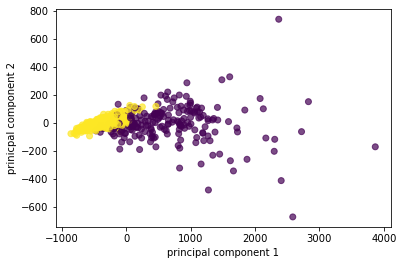

In [24]:
plt.scatter(X_new[:,0], X_new[:,1], c=y, alpha=.7)
plt.xlabel('principal component 1')
plt.ylabel('prinicpal component 2')

### Select top features with a chi squared test.

In [25]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)

In [26]:
X_new.shape
#X_new = pca.fit_transform(X_new)

(569, 2)

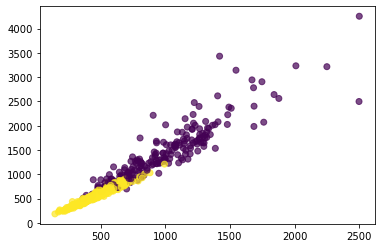

In [27]:
plt.scatter(X_new[:,0], X_new[:,1], c=y, alpha=.7)

## False discovery rate (FDR)

In the above example we predetermined to select the 2 best features. What if we want a dynamic number of features, depending on how many are *"significat"*? Then we have to perform one test per feature, and the more features we add, the more false positives we necessarily will obtain. This is known as the problem of *multiple comparisons*, and one way to deal with it is by adjusting the threshold (p-value) at which we seperate significant from non-significant. The most commonly used method is the Benjamini-Hochberg method (FDR).

In [28]:
from sklearn.feature_selection import SelectFdr
selector = SelectFdr(chi2, alpha=0.01) # control at a false discovery rate of 1% 
X_new = selector.fit_transform(X,y)

#### Exercise 4. How many features were selected at a FDR=0.01? 

In [29]:
# %load solutions/ex4_4.py
print(X.shape)
print(X_new.shape)
# we see that 16 features have been selected

(569, 30)
(569, 16)


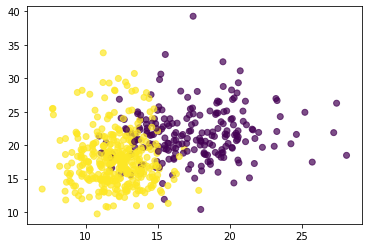

In [30]:
plt.scatter(X_new[:,0], X_new[:,1], c=y, alpha=.7)

In [31]:
# Which features are they?
for feat in data.feature_names[selector.get_support()]:
    print(feat)

mean radius
mean texture
mean perimeter
mean area
mean concavity
mean concave points
radius error
perimeter error
area error
worst radius
worst texture
worst perimeter
worst area
worst compactness
worst concavity
worst concave points


#### Exercise 5. Sort the features by p-value from lowest to highest.

In [32]:
# %load solutions/ex4_5.py
pvals = dict(zip(data.feature_names, selector.pvalues_))
sorted(pvals.items(), key=lambda x: x[1])

[('mean perimeter', 0.0),
 ('mean area', 0.0),
 ('area error', 0.0),
 ('worst perimeter', 0.0),
 ('worst area', 0.0),
 ('worst radius', 6.11324750735313e-109),
 ('mean radius', 8.013976278331656e-60),
 ('perimeter error', 1.948774891681779e-56),
 ('worst texture', 7.896682986749953e-40),
 ('mean texture', 3.322921942470427e-22),
 ('worst concavity', 3.252300636142287e-10),
 ('radius error', 3.895534287117034e-09),
 ('mean concavity', 9.001757118104526e-06),
 ('worst compactness', 1.1083676221330312e-05),
 ('worst concave points', 0.00024042438366697277),
 ('mean concave points', 0.001165636383725412),
 ('mean compactness', 0.0201012998699303),
 ('worst symmetry', 0.2544213070985001),
 ('concavity error', 0.3067268121487044),
 ('compactness error', 0.43336611540692427),
 ('worst smoothness', 0.5284528674102662),
 ('concave points error', 0.5806211370197781),
 ('mean symmetry', 0.6119260262217883),
 ('worst fractal dimension', 0.6303972770282347),
 ('mean smoothness', 0.6986316439643429)

In [33]:
pvals = selector.pvalues_

<BarContainer object of 30 artists>

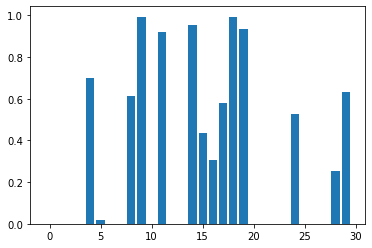

In [34]:
plt.bar(x=range(30), height=pvals)

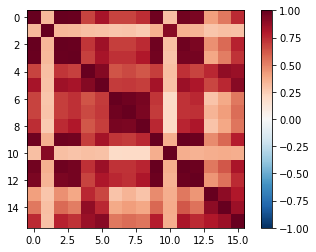

In [35]:
# features are highly correlated, which could be a problem
np.set_printoptions(2)
plt.imshow(np.corrcoef(X_new.T), cmap='RdBu_r', vmin=-1, vmax=1)
plt.colorbar()

# Multi-variate feature selection

drawbacks of univariate is that it completely ignores the idea of synergy. Maybe sometimes two features need to be present simultaneously in order to have an effect. This is ignored in the above methods.

### Linear regression
Linear regression is both used as a predictive model in itself, but we can leverage it to select our top features, and handles high noise levels greatly. Particularly Lasso regression (L1-penalty) is naturally suited for reducing the number of features, and importantly it does so by considering all features at the same time. The drawback of Lasso is that sometimes multiple features are correlated to each other (collinerity). In that case, Lasso will select just one of them at random. Ridge regression will do better in that case.

We will use logistic regression instead, as we are dealing with a classification problem.

In [36]:
from sklearn.linear_model import LogisticRegression

Text(0.5, 1.0, 'Logistic regression with L1-penalty weights')

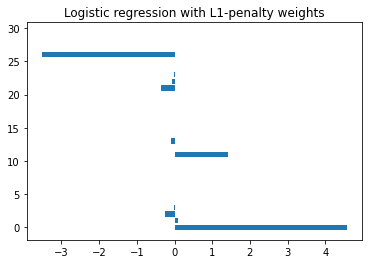

In [37]:
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X, y)

plt.barh(y=range(30), width=model.coef_[0])
plt.title('Logistic regression with L1-penalty weights')

In [38]:
model.coef_

array([[ 4.56,  0.1 , -0.26, -0.02,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  1.42,  0.  , -0.1 ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  , -0.36, -0.08, -0.02,  0.  ,  0.  , -3.51,
         0.  ,  0.  ,  0.  ]])

## PLS-DA
Partial least squares discriminant analysis is not feature selection *per se*, but feature engineering. It can be thought of like a supervised PCA: it creates new features based on the existing ones.

In [39]:
from sklearn.cross_decomposition import PLSRegression

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [42]:
pls = PLSRegression(n_components=8)
X_new,_ = pls.fit_transform(X_train, y_train)

In [43]:
biggest = np.argmax(pls.coef_)
pls.coef_[biggest]

array([0.13])

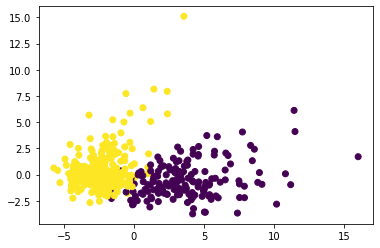

In [44]:
plt.scatter(X_new[:,0], X_new[:,1], c=y_train)

How to select the features? We said that PLS-DA makes new features from the old ones, so how can we use it for feature selection? If we look at the coefficients of the model, we can select the most impactful features (those with highest coefficients)

In [45]:
cfs = pls.coef_

In [46]:
import numpy as np

In [47]:
X_new.shape

(426, 8)

Text(0.5, 1.0, 'Correlation of new engineered features')

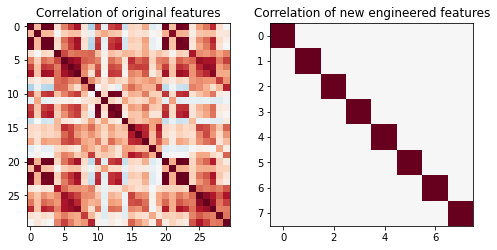

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(8,8))
ax[0].imshow(np.corrcoef(X.T), 'RdBu_r', vmin=-1,vmax=1)
ax[0].set_title('Correlation of original features')
ax[1].imshow(np.corrcoef(X_new.T), 'RdBu_r', vmin=-1,vmax=1)
ax[1].set_title('Correlation of new engineered features')

## Interpreting coefficients

Very commonly we look at the coefficients of a linear model (e.g. linear regression, SVC, or any linear feature selection technique) to determine how *important* the corresponding features are (large coefficeint => important feature), conditional on the other features.

### Correlated features
A problem arises when different input features are correlated between eachother - how does the linear model (or a univariate feature selection procedure) know which one of them to select? There is in fact no easy way of knowing, and models often yield inconsistent coefficients. This instability can actually be used to our advantage: doing a feature importance analysis with cross validation will let us identify these instable features, to warn us to cautiously interpret them.
 
### A final word on feature scaling

While models like linear regression are not affected by feature scaling, interpreting the resulting model is. Therefore we recommend scaling as being something you do by routine. Check [this](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py) and [this](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#interpreting-coefficients-scale-matters) example from sklearn to see how.


Further reading: 
- https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection
- https://towardsdatascience.com/select-features-for-omics-integration-511390b7e7fd

# Feature Extraction

Using unsupervised methods as a preprocessing step prior to supervised classification/regression. This can be used to speed up algorithms which are slow, or sometimes even improve classification performance.

In [49]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import load_digits

In [50]:
from tensorflow.keras import datasets as ds
fashion_mnist = ds.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
scaler = StandardScaler()
# flatten
train_images = train_images.reshape(60000, 28*28)
test_images = test_images.reshape(10000, 28*28)

train_images = scaler.fit_transform(train_images)
test_images = scaler.transform(test_images)

In [ ]:
scaler = StandardScaler()
logreg = LogisticRegression()
model = make_pipeline(scaler, logreg)

model.fit(train_images, train_labels)
preds = model.predict(test_images)
print(classification_report(test_labels, preds))

In [ ]:
#https://stackabuse.com/autoencoders-for-image-reconstruction-in-python-and-keras/
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from tensorflow.keras.models import Sequential, Model

def build_autoencoder(img_shape, code_size):
    # The encoder
    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    encoder.add(Flatten())
    encoder.add(Dense(code_size))


    # The decoder
    decoder = Sequential()
    decoder.add(InputLayer((code_size,)))
    decoder.add(Dense(np.prod(img_shape))) # np.prod(img_shape) is the same as 32*32*3, it's more generic than saying 3072
    decoder.add(Reshape(img_shape))
    return encoder, decoder

In [ ]:
# unflatten
train_images = train_images.reshape(60000, 28, 28)
test_images = test_images.reshape(10000, 28, 28)

In [ ]:
IMG_SHAPE = train_images.shape[1:]
print(IMG_SHAPE)
encoder, decoder = build_autoencoder(IMG_SHAPE, 100)

inp = Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp,reconstruction)
autoencoder.compile(optimizer='adamax', loss='mse')
print(autoencoder.summary())

### Train

In [ ]:
history = autoencoder.fit(x=train_images, y=train_images, epochs=20)#,
                #validation_data=[test_images, test_images])

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Predicting  from the compressed features

In [ ]:
scaler = StandardScaler()
logreg = LogisticRegression()
model = make_pipeline(scaler, logreg)

# unflatten
train_images = train_images.reshape(60000, 28, 28)
test_images = test_images.reshape(10000, 28, 28)

# encode using the trained AE
train_coded = encoder.predict(train_images)
test_coded = encoder.predict(test_images)

# train on the compressed data
model.fit(train_coded, train_labels)
preds = model.predict(test_coded)

print(classification_report(test_labels, preds))

In [ ]:
# Define model and preprocessing
pca = PCA(150)
logreg = LogisticRegression()
model = make_pipeline(pca, scaler, logreg)

train_images = train_images.reshape(60000, 28*28)
test_images = test_images.reshape(10000, 28*28)

# transform / preprocess
#X_train = preproc.fit_transform(train_images, train_labels)
#X_test = preproc.transform(test_images)

# train on transformed data
model.fit(train_images, train_labels)

preds = model.predict(test_images)
print(classification_report(test_labels, preds))